# Taller 1 - Punto 3

## Cargue Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling #funcion para ver missing values por variables en DF**
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import mglearn
import graphviz 
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

### Funcione para encontrar valores ausentes

In [2]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

### Funcion para numerizar valores categoricos

In [3]:
def numerizar_var(dataset):
    for c in dataset.columns:
        if dataset[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(dataset[c].values))
            dataset[c] = lbl.transform(list(dataset[c].values))

### Funcion para normalziar valores numericos

In [4]:
def normalizar_var(dataset):
    num_cols = dataset.columns[dataset.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
    scaler = StandardScaler()
    dataset[num_cols] = scaler.fit_transform(dataset[num_cols])

### Carga set de datos

In [5]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv',sep=",")

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [9]:
df.shape

(1470, 35)

### Histograma atributos numéricos

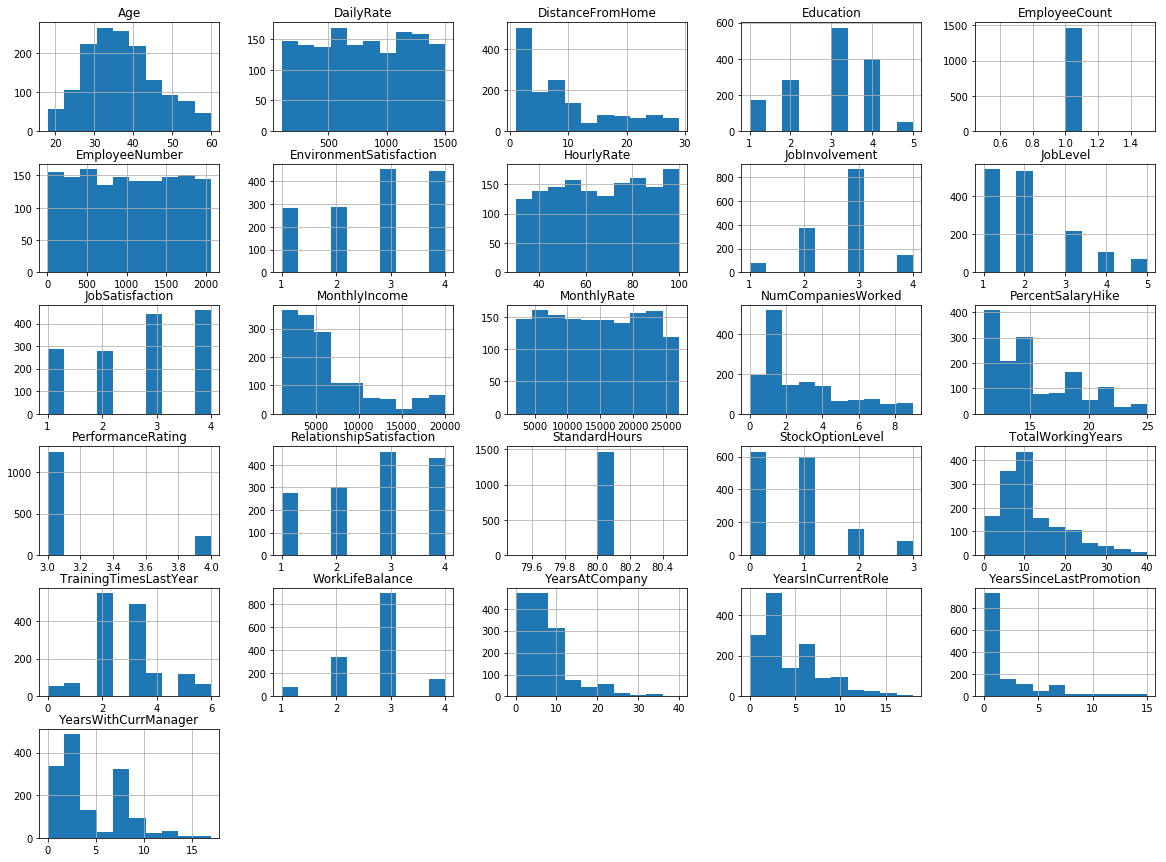

In [10]:
# Se pueden generar los histogramas
df.hist(bins=10, figsize=(20,15));

In [11]:
#valores omitidos por variable
missing_values_table(df)

,Missing Values,% of Total Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [12]:
#dateccion duplicadso
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## Descripción general de datos

#### 	Dataste conformado por 1470 instancias y 35 atributos, numéricos y categóricos.
####    Atributo clase: Attrition. Categórico, binario: Yes, No.
#### 	Atributo Identificador: EmployeeNumber. Numérico.


## Preprocesamiento de Datos

### Estadísticas Básicas y Correlación de atributos

In [13]:
pandas_profiling.ProfileReport(df)

Number of variables,35
Number of observations,1470
Total Missing (%),0.0%
Total size in memory,402.0 KiB
Average record size in memory,280.1 B
Numeric,22
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,4


In [14]:
print(df["EmployeeCount"].unique(), df["Over18"].unique(), df["StandardHours"].unique())

[1] ['Y'] [80]


In [15]:
df["MonthlyIncome"].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

###     No Hay valores ausentes, No Valores duplicados en el set de datos.
### 	Apartir de los Histogramas no se observan valores  atípicos (outlayers)
###     Atributos con valores constantes: EmployeeCount - Over18 - StandardHours


## Atributos correlacionados: por método de Spearman y Pearson

In [16]:
df[["MonthlyIncome","JobLevel"]].sort_values(by='MonthlyIncome', ascending=True, na_position='first')

,MonthlyIncome,JobLevel
513,1009,1
727,1051,1
764,1052,1
1338,1081,1
1365,1091,1
177,1102,1
911,1118,1
1402,1129,1
301,1200,1
910,1223,1


In [17]:
df[["TotalWorkingYears","Age","MonthlyIncome","JobLevel"]].sort_values(by='TotalWorkingYears', ascending=True, na_position='first')

,TotalWorkingYears,Age,MonthlyIncome,JobLevel
1153,0,18,1569,1
1311,0,18,1514,1
457,0,18,1878,1
828,0,18,1904,1
615,0,27,1706,1
296,0,18,1420,1
127,0,19,1675,1
301,0,18,1200,1
23,0,21,1232,1
972,0,18,1611,1


### Eliminación de atributos correlacionados: MonthlyIncome - TotalWorkingYears
### Eliminación de atributos por no tener carga informativa útil al modelo :
### EmployeeCount - Over18 - StandardHours - EmployeeNumber

In [18]:
df_ = df.drop(['EmployeeCount', 'Over18','StandardHours','EmployeeNumber','TotalWorkingYears','MonthlyIncome'], axis=1)

In [19]:
df_.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,1,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,1,3,3,2,2,2,2


In [20]:
#Estadicas por variable
pandas_profiling.ProfileReport(df_)

Number of variables,29
Number of observations,1470
Total Missing (%),0.0%
Total size in memory,333.1 KiB
Average record size in memory,232.1 B
Numeric,20
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [21]:
df_.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,1,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,1,3,3,2,2,2,2


In [22]:
df_.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager

### Como resultado se obtiene un dataset de 1470 instancias y 29 Atributos. Uno de los cuales es el atributo "Clase" :  Attrition                  
### Con el fin de tener un mejor desempeño y a pesar de que los algoritmos de árbol de decisión son tolerantes, tanto a variable numéricas como categóricas, se procede a normalizar los atributos numéricos y a numerizar los valores categóricos, incluido el atributo clase “Attrition”.


In [23]:

normalizar_var(df_)

In [24]:
numerizar_var(df_)

In [25]:
df_.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,-0.660531,0,...,-1.150554,-0.426230,-1.584178,-0.932014,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.254625,1,...,2.129306,2.346151,1.191438,0.241988,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,1.169781,1,...,-0.057267,-0.426230,-0.658973,-0.932014,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,1.169781,0,...,-1.150554,-0.426230,0.266233,-0.932014,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,-1.575686,1,...,-0.877232,-0.426230,1.191438,0.241988,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
5,-0.539166,0,1,0.502054,1,-0.887515,-0.891688,1,1.169781,1,...,-0.603911,-0.426230,0.266233,-0.932014,-0.620189,-1.077862,-0.001333,0.764998,0.252146,0.526188
6,2.417384,0,2,1.292887,1,-0.764121,0.085049,3,0.254625,0,...,1.309341,2.346151,-1.584178,2.589994,0.155707,-1.077862,-0.981014,-1.167687,-0.679146,-1.155935
7,-0.758170,0,2,1.377177,1,1.827158,-1.868426,1,1.169781,1,...,1.855984,2.346151,-0.658973,0.241988,-0.620189,0.338096,-0.981014,-1.167687,-0.679146,-1.155935
8,0.117845,0,1,-1.453958,1,1.703764,0.085049,1,1.169781,1,...,1.582663,2.346151,-0.658973,-0.932014,-0.620189,0.338096,0.325228,0.764998,-0.368715,1.086895
9,-0.101159,0,2,1.230910,1,2.197341,0.085049,3,0.254625,1,...,-0.603911,-0.426230,-0.658973,1.415991,0.155707,-1.077862,-0.001333,0.764998,1.493867,0.806541


In [26]:
#Desbalance de clases
df_["Attrition"].unique()

array([1, 0], dtype=int64)

Clase 0 - No: 1233
Clase 1 - Yes: 237
Proposion : 5.2 : 1


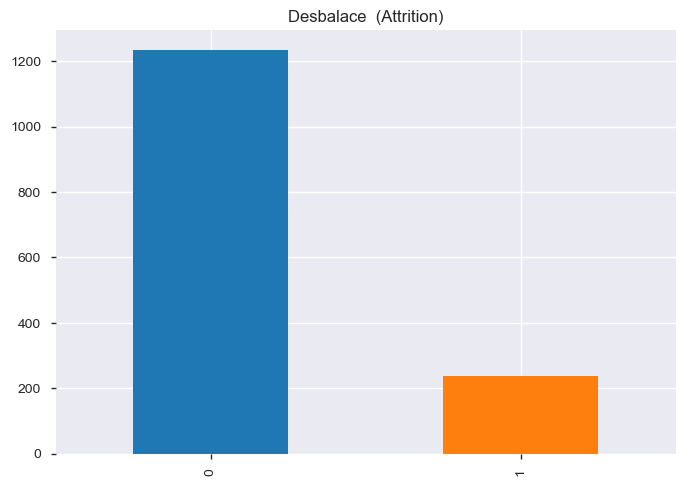

In [27]:
target_count = df_.Attrition.value_counts()
print('Clase 0 - No:', target_count[0])
print('Clase 1 - Yes:', target_count[1])
print('Proposion :', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Desbalace  (Attrition)');

### 	Se observa un desbalance de clases
### Este desbalance será controlado en la etapa de entrenamiento del modelo.

## Se obtiene el arreglo de datos (X,y) de atributos y de clase

In [28]:
X = df_.drop(["Attrition"],axis=1) 
y = df_["Attrition"]

In [29]:
nombres = df_.columns.values.tolist()
nombres =  np.delete(nombres,1)
nombres

array(['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype='<U24')

In [30]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2,0.742527,2,-1.010909,-0.891688,1,-0.660531,0,1.383138,...,-1.150554,-0.426230,-1.584178,-0.932014,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,1,-1.297775,1,-0.147150,-1.868426,1,0.254625,1,-0.240677,...,2.129306,2.346151,1.191438,0.241988,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2,1.414363,1,-0.887515,-0.891688,4,1.169781,1,1.284725,...,-0.057267,-0.426230,-0.658973,-0.932014,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1,1.461466,1,-0.764121,1.061787,1,1.169781,0,-0.486709,...,-1.150554,-0.426230,0.266233,-0.932014,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,2,-0.524295,1,-0.887515,-1.868426,3,-1.575686,1,-1.274014,...,-0.877232,-0.426230,1.191438,0.241988,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [31]:
df_.dtypes

Age                         float64
Attrition                     int64
BusinessTravel                int64
DailyRate                   float64
Department                    int64
DistanceFromHome            float64
Education                   float64
EducationField                int64
EnvironmentSatisfaction     float64
Gender                        int64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                       int64
JobSatisfaction             float64
MaritalStatus                 int64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     

In [32]:
X=np.array(X)
y= np.array(y)

In [33]:
X.shape

(1470, 28)

In [34]:
y.shape

(1470,)

In [35]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
X

array([[ 0.4463504 ,  2.        ,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521,  1.        , -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  2.        ,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  2.        , -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  1.        ,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  2.        , -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

# Modelo Inicial --  Arboles de Decisión

### Set de datos de entrenamineto y test 

In [37]:
X_train_, X_test, y_train_, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

### Set de datos de Validación

In [38]:
#validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train_,y_train_,test_size=0.3, random_state=0)

In [39]:
print('Entrenamiento: {}% | Validacion: {}% | Test {}%'.format(round(len(y_train)/len(y),2)*100,
                                                       round(len(y_validation)/len(y),2)*100,
                                                       round(len(y_test)/len(y),2)*100))

Entrenamiento: 49.0% | Validacion: 21.0% | Test 30.0%


### Sets de datos: Entrenamiento: 49.0% | Validacion: 21.0% | Test 30.0%

### Validacion error en etrenamiento - evaluacion - test . 
### Aumentando la compejidad del modelo: nivel de profundidad del arbol

In [40]:
complejidad = [1,2,3,4,5,6,7,8,9,10]
error_entrenamiento= []
error_validacion= []
acu_entrenamiento=[]
acu_validacion=[]
#error_test =[]
for c in complejidad:
    clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth=c, random_state=0)
    clf = clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)

    error_entrenamiento.append(mean_squared_error(y_train,  y_train_pred))
    
    y_validation_pred = clf.predict(X_validation)
    error_validacion.append(mean_squared_error(y_validation,  y_validation_pred))
  
    print("Complejidad :", c)
    print("Error cuadrado medio Entrenamiento  :", mean_squared_error(y_train,  y_train_pred))
    print("Error cuadrado medio Validacion     :", mean_squared_error(y_validation,  y_validation_pred))
    
    acu_entrenamiento.append(clf.score(X_train, y_train))
    acu_validacion.append(clf.score(X_validation,y_validation))
    
    print("Exactitud del modelo Entrenamiento: {:.3f}".format(clf.score(X_train, y_train)))
    print("Exactitud del modelo Validacion   : {:.3f}".format(clf.score(X_validation,y_validation)))
    print("")

Complejidad : 1
Error cuadrado medio Entrenamiento  : 0.33055555555555555
Error cuadrado medio Validacion     : 0.34951456310679613
Exactitud del modelo Entrenamiento: 0.669
Exactitud del modelo Validacion   : 0.650

Complejidad : 2
Error cuadrado medio Entrenamiento  : 0.39305555555555555
Error cuadrado medio Validacion     : 0.41423948220064727
Exactitud del modelo Entrenamiento: 0.607
Exactitud del modelo Validacion   : 0.586

Complejidad : 3
Error cuadrado medio Entrenamiento  : 0.22777777777777777
Error cuadrado medio Validacion     : 0.2783171521035599
Exactitud del modelo Entrenamiento: 0.772
Exactitud del modelo Validacion   : 0.722

Complejidad : 4
Error cuadrado medio Entrenamiento  : 0.24166666666666667
Error cuadrado medio Validacion     : 0.32362459546925565
Exactitud del modelo Entrenamiento: 0.758
Exactitud del modelo Validacion   : 0.676

Complejidad : 5
Error cuadrado medio Entrenamiento  : 0.16527777777777777
Error cuadrado medio Validacion     : 0.2783171521035599
Ex

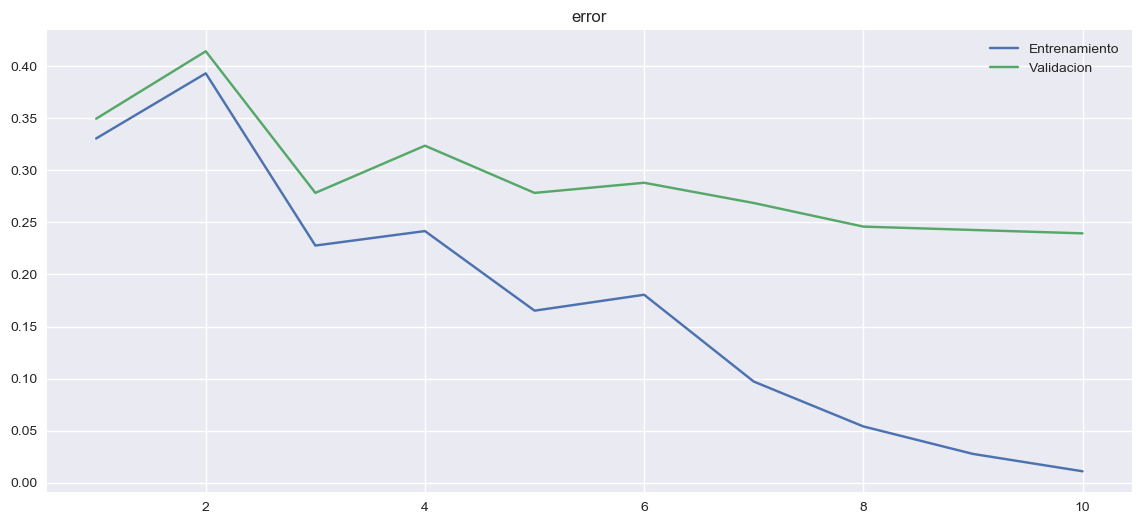

In [41]:
plt.style.use('seaborn')
plt.figure(figsize=[14,6])
plt.plot(complejidad, error_entrenamiento, label ="Entrenamiento")
plt.plot(complejidad, error_validacion, label ="Validacion")
plt.title('error')
plt.legend()
plt.show()

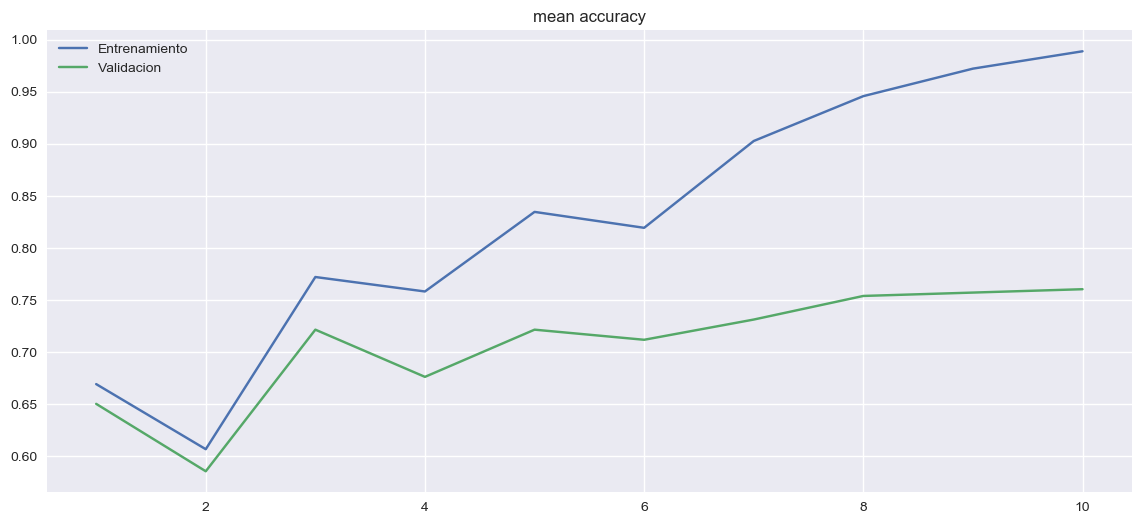

In [42]:
plt.style.use('seaborn')
plt.figure(figsize=[14,6])
plt.plot(complejidad, acu_entrenamiento, label ="Entrenamiento")
plt.plot(complejidad, acu_validacion, label ="Validacion")
#plt.plot(complejidad,error_test,label='Test')
plt.title('mean accuracy')
plt.legend()
plt.show()

### Se observa que para la complejidad c = 3, el modelo presenta el menor margen de error entre validación y entrenamiento. Lo que indica que esta podría ser la complejidad optima del modelo, con una exactitud promedio de 72%

## Validación de la complejidad con CROSS-VALIDATION


### Set de datos de entrenamiento y Test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

##  KFOLD  cross-validation  K =10 
### Con Balanceo de clases {1:6}

In [44]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=0)
complejidad = [1,2,3,4,5,6,7,8,9,10]
error_entrenamiento= []
error_validacion= []
#error_test =[]
for c in complejidad:
  
    clf = tree.DecisionTreeClassifier(class_weight={1:6},max_depth=c,  random_state=0)
    
    error_entrenamiento_kfold= []
    error_validacion_kfold=[]
    error_test_kfold=[]
    
       
    for train_index, validation_index in kf.split(X_train):
        X_entrenamiento =  X_train[train_index]
        y_entrenamiento =  y_train[train_index]
        X_validacion= X_train[validation_index]
        y_validacion= y_train[validation_index]
        
  
        clf = clf.fit(X_entrenamiento, y_entrenamiento)
        
        y_train_pred = clf.predict(X_entrenamiento)
        error_entrenamiento_kfold.append(mean_squared_error(y_entrenamiento,  y_train_pred))
        
        y_validation_pred = clf.predict(X_validacion)
        error_validacion_kfold.append(mean_squared_error(y_validacion,  y_validation_pred))
        
    
    error_entrenamiento.append(np.mean(error_entrenamiento_kfold))
    error_validacion.append(np.mean(error_validacion_kfold))
    
        
   
    print("Complejidad :", c)
    print("Error cuadrado medio Entrenamiento  :", np.mean(error_entrenamiento_kfold))
    print("Error cuadrado medio Validacion     :", np.mean(error_validacion_kfold))
    
    
    
    print("")
   

   


Complejidad : 1
Error cuadrado medio Entrenamiento  : 0.2778335791389116
Error cuadrado medio Validacion     : 0.297401484865791

Complejidad : 2
Error cuadrado medio Entrenamiento  : 0.35126292809196624
Error cuadrado medio Validacion     : 0.36447744146202166

Complejidad : 3
Error cuadrado medio Entrenamiento  : 0.2412255563244261
Error cuadrado medio Validacion     : 0.2780030458785456

Complejidad : 4
Error cuadrado medio Entrenamiento  : 0.23237364311825925
Error cuadrado medio Validacion     : 0.2896059394631639

Complejidad : 5
Error cuadrado medio Entrenamiento  : 0.15981113743910197
Error cuadrado medio Validacion     : 0.2419950504473634

Complejidad : 6
Error cuadrado medio Entrenamiento  : 0.14112746708418666
Error cuadrado medio Validacion     : 0.2459071007043594

Complejidad : 7
Error cuadrado medio Entrenamiento  : 0.10959573719539331
Error cuadrado medio Validacion     : 0.2488197220635827

Complejidad : 8
Error cuadrado medio Entrenamiento  : 0.08195530765305765
Erro

### Curvas de error en entrenamiento y Validación

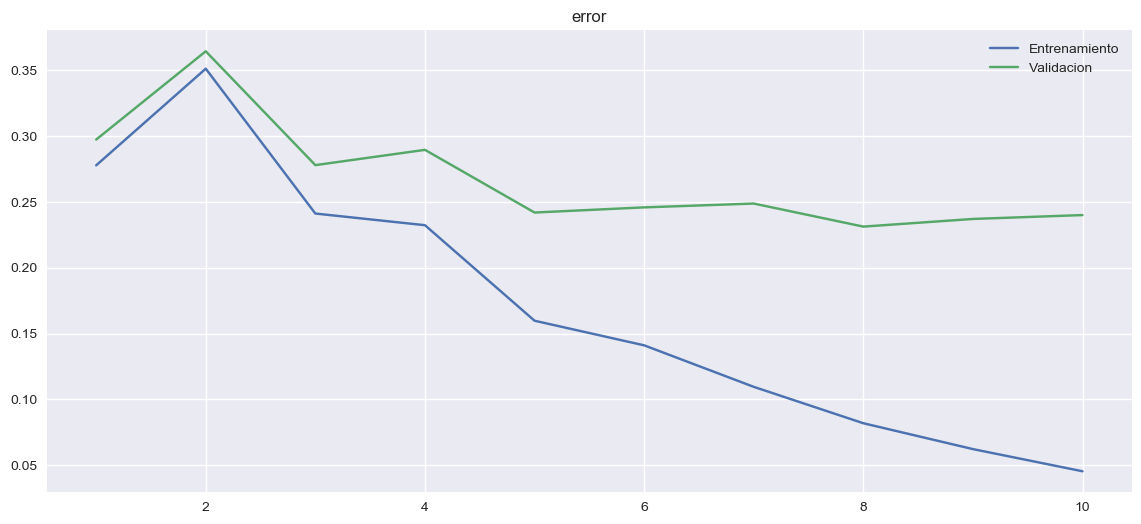

In [45]:
plt.style.use('seaborn')
plt.figure(figsize=[14,6])
plt.plot(complejidad, error_entrenamiento, label ="Entrenamiento")
plt.plot(complejidad, error_validacion, label ="Validacion")
plt.title('error')
plt.legend()
plt.show()

### El kfold , utiliza todos los datos del set de entrenamiento (o del set que se pase) , hace k particiones de este set en entrenamiento y validación , cada vez diferentes. Genera dos arreglos uno con los índices de los datos de entrenamiento y otro con los índices  de los datos para validación (los índices de las  instancias). En cada iteración de las K se obtiene una métrica (acuracy, precisión, o error cuadrado medio) es un único valor para esta iteración. Entonces con K iteraciones se tendrán k métricas (la que escoja). Así el valor final de la métrica escogida  es el promedio de todas la k métricas (promedio del kfold, la salida del kfold debe ser un solo valor que es el promedio de todas las  k iteraciones )

### Si esto se hace para varios N modelos dependiendo de la complejidad, entonces por cada modelo se hace el kfold, asi se tendrá un arreglo con N métricas, cada una es la salida del kfold (el promedio de todas las k iteraciones).

## Se observa que con cross-validation el valor óptimo de la complejidad sigue siendo 
## c = 3

In [46]:
np.mean(error_validacion)

0.26747001713306673

In [47]:
np.mean(error_entrenamiento)

0.17029493174526622

### Promedio del error en entrenamiento : 0.170 y promedio de error en validación = 0.266

### Resultados con Cross-Validation  FOLD Estratificado


In [48]:
from sklearn.model_selection import StratifiedKFold
K = 10
kf = StratifiedKFold(n_splits=K)
complejidad = [1,2,3,4,5,6,7,8,9,10]

error_entrenamiento= []
error_validacion= []
acu_entrenamiento=[]
acu_validacion = []
#error_test =[]
for c in complejidad:
    clf = tree.DecisionTreeClassifier(class_weight={1:6},max_depth=c,  random_state=0)
    error_entrenamiento_kfold= []
    error_validacion_kfold=[]
    acu_entrenamiento_kfold =[]
    acu_validacion_kfold=[]
    
    for train_index, validation_index in kf.split(X_train,y_train):
        X_entrenamiento =  X_train[train_index]
        y_entrenamiento =  y_train[train_index]
        X_validacion= X_train[validation_index]
        y_validacion= y_train[validation_index]

        clf = clf.fit(X_entrenamiento, y_entrenamiento)
        
        y_train_pred = clf.predict(X_entrenamiento)
        error_entrenamiento_kfold.append(mean_squared_error(y_entrenamiento,  y_train_pred))
        
        y_validation_pred = clf.predict(X_validacion)
        error_validacion_kfold.append(mean_squared_error(y_validacion,  y_validation_pred))
        
        acu_entrenamiento_kfold.append (clf.score(X_entrenamiento,y_entrenamiento))
        acu_validacion_kfold.append (clf.score(X_validacion,y_validacion))
        
    
    error_entrenamiento.append(np.mean(error_entrenamiento_kfold))
    error_validacion.append(np.mean(error_validacion_kfold))
    acu_entrenamiento.append(np.mean(acu_entrenamiento_kfold))
    acu_validacion.append(np.mean(acu_validacion_kfold))
    
    print("Complejidad :", c)
    print("Error cuadrado medio Entrenamiento  :", np.mean(error_entrenamiento_kfold))
    print("Error cuadrado medio Validacion     :", np.mean(error_validacion_kfold))
    print("Exactitud del modelo Entrenamiento  :", np.mean(acu_entrenamiento_kfold))  
    print("Exactitud del modelo Validacion     :", np.mean(acu_validacion_kfold))
    print("")
   

     


Complejidad : 1
Error cuadrado medio Entrenamiento  : 0.29252836505695656
Error cuadrado medio Validacion     : 0.31582355869905837
Exactitud del modelo Entrenamiento  : 0.7074716349430435
Exactitud del modelo Validacion     : 0.6841764413009417

Complejidad : 2
Error cuadrado medio Entrenamiento  : 0.3720062299293149
Error cuadrado medio Validacion     : 0.3982019432119375
Exactitud del modelo Entrenamiento  : 0.627993770070685
Exactitud del modelo Validacion     : 0.6017980567880625

Complejidad : 3
Error cuadrado medio Entrenamiento  : 0.25958736248882824
Error cuadrado medio Validacion     : 0.28076538681193164
Exactitud del modelo Entrenamiento  : 0.7404126375111717
Exactitud del modelo Validacion     : 0.7192346131880684

Complejidad : 4
Error cuadrado medio Entrenamiento  : 0.2223446531099868
Error cuadrado medio Validacion     : 0.28363059936446566
Exactitud del modelo Entrenamiento  : 0.7776553468900131
Exactitud del modelo Validacion     : 0.7163694006355342

Complejidad : 5


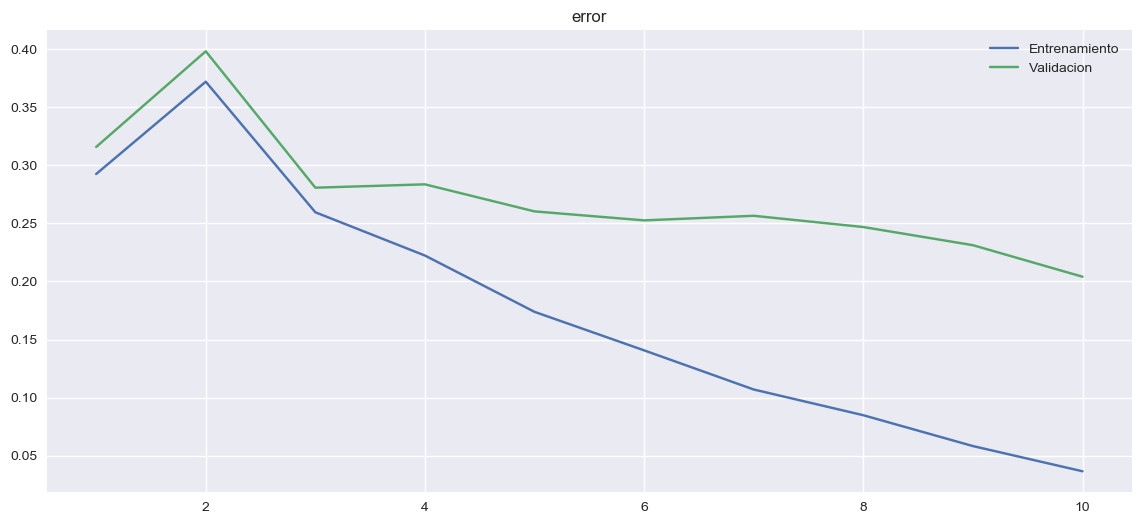

In [49]:
plt.style.use('seaborn')
plt.figure(figsize=[14,6])
plt.plot(complejidad, error_entrenamiento, label ="Entrenamiento")
plt.plot(complejidad, error_validacion, label ="Validacion")
plt.title('error')
plt.legend()
plt.show()

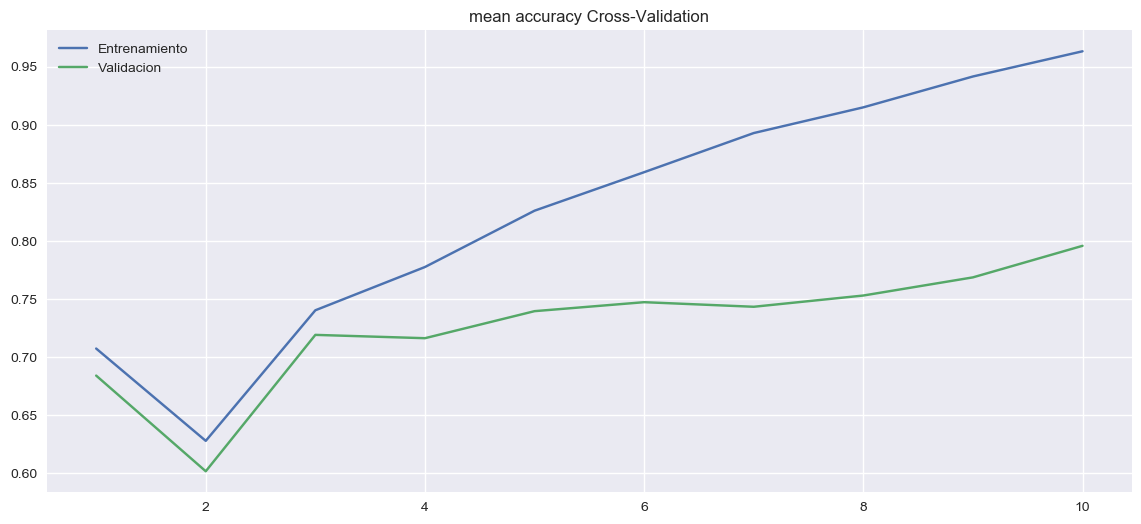

In [50]:
plt.style.use('seaborn')
plt.figure(figsize=[14,6])
plt.plot(complejidad, acu_entrenamiento, label ="Entrenamiento")
plt.plot(complejidad, acu_validacion, label ="Validacion")
plt.title('mean accuracy Cross-Validation')
plt.legend()
plt.show()

### De igual forma se observa que la complejidad optima es c=3. La curva de error en entrenamiento es más normalizada con kfold estratificado. Con respecto a la exactitud obviamente al aumentar la complejidad del modelo aumenta la exactitud tanto en entrenamiento por ensima de 95%, entre tanto en validación no supera el 80%.
### Por lo cual el mejor modelo se obtiene con una complejidad de C=3  y una exactitud de 71.9%


## Modelo con class_weight='balanced'

In [51]:
from sklearn.model_selection import StratifiedKFold
K = 10
kf = StratifiedKFold(n_splits=K)
complejidad = [1,2,3,4,5,6,7,8,9,10]

error_entrenamiento= []
error_validacion= []
acu_entrenamiento=[]
acu_validacion = []
#error_test =[]
for c in complejidad:
    clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth=c, random_state=0)
    error_entrenamiento_kfold= []
    error_validacion_kfold=[]
    acu_entrenamiento_kfold =[]
    acu_validacion_kfold=[]
    
    for train_index, validation_index in kf.split(X_train,y_train):
        X_entrenamiento =  X_train[train_index]
        y_entrenamiento =  y_train[train_index]
        X_validacion= X_train[validation_index]
        y_validacion= y_train[validation_index]
        
        clf = clf.fit(X_entrenamiento, y_entrenamiento)
        
        y_train_pred = clf.predict(X_entrenamiento)
        error_entrenamiento_kfold.append(mean_squared_error(y_entrenamiento,  y_train_pred))
        
        y_validation_pred = clf.predict(X_validacion)
        error_validacion_kfold.append(mean_squared_error(y_validacion,  y_validation_pred))
        
        acu_entrenamiento_kfold.append (clf.score(X_entrenamiento,y_entrenamiento))
        acu_validacion_kfold.append (clf.score(X_validacion,y_validacion))
        
    
    error_entrenamiento.append(np.mean(error_entrenamiento_kfold))
    error_validacion.append(np.mean(error_validacion_kfold))
    acu_entrenamiento.append(np.mean(acu_entrenamiento_kfold))
    acu_validacion.append(np.mean(acu_validacion_kfold))
    
    print("Complejidad :", c)
    print("Error cuadrado medio Entrenamiento  :", np.mean(error_entrenamiento_kfold))
    print("Error cuadrado medio Validacion     :", np.mean(error_validacion_kfold))
    print("Exactitud del modelo Entrenamiento  :", np.mean(acu_entrenamiento_kfold))  
    print("Exactitud del modelo Validacion     :", np.mean(acu_validacion_kfold))
    print("")


Complejidad : 1
Error cuadrado medio Entrenamiento  : 0.28604187857047003
Error cuadrado medio Validacion     : 0.3052466356221354
Exactitud del modelo Entrenamiento  : 0.71395812142953
Exactitud del modelo Validacion     : 0.6947533643778647

Complejidad : 2
Error cuadrado medio Entrenamiento  : 0.26497969646553177
Error cuadrado medio Validacion     : 0.2934813806030254
Exactitud del modelo Entrenamiento  : 0.7350203035344681
Exactitud del modelo Validacion     : 0.7065186193969746

Complejidad : 3
Error cuadrado medio Entrenamiento  : 0.18756337385425853
Error cuadrado medio Validacion     : 0.21660900730717975
Exactitud del modelo Entrenamiento  : 0.8124366261457414
Exactitud del modelo Validacion     : 0.7833909926928202

Complejidad : 4
Error cuadrado medio Entrenamiento  : 0.19598670250699018
Error cuadrado medio Validacion     : 0.25653015126887196
Exactitud del modelo Entrenamiento  : 0.8040132974930099
Exactitud del modelo Validacion     : 0.743469848731128

Complejidad : 5
E

## Se observa que el modelo con class_weight='balanced' y complejidad c=3 tiene una exactitud de 78%, que ofrece un mejor rendimiento y generalización.

# Modelo de complejidad c = 3

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [53]:
#Se crea el modelo (objeto de la clase DecisionTreeClassifier)
clf_ = tree.DecisionTreeClassifier(class_weight='balanced',max_depth=3, random_state=0)
clf_.fit(X_train,y_train)
# Evaluación del modelo
print("Exactitud del modelo sobre el conjunto de entrenamiento: {:.3f}".format(clf_.score(X_train, y_train)))
print("Exactitud del modelo sobre el conjunto test: {:.3f}". format(clf_.score(X_test,y_test)))

Exactitud del modelo sobre el conjunto de entrenamiento: 0.835
Exactitud del modelo sobre el conjunto test: 0.800


## Se observa que al utilizar el set de datos completo para entrenamiento 70% y para test 30% la exactitud es de 80%

# CON GRIDSEARCH

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
'class_weight': ['balanced', {1:5},{1:6},{1:7},{1:8}]}


grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'class_weight': {1: 6}, 'max_depth': 11}
Best cross-validation score: 0.80


### Utilizando gridsearch, para encontrar los mejores parámetros: 'class_weight': {1: 5}, 'max_depth': 3 , para una exactitud parecida con el modelo menso complejo max_depth = 3, 'balanced'

In [55]:
print(" 0 :",(y_test==0).sum())
print(" 1 :",(y_test==1).sum())

 0 : 371
 1 : 70


In [56]:
y_test.size

441

## Metricas sobre conjunto de datos de Test

In [57]:
# Sobre test
from sklearn.metrics import confusion_matrix
tree_predicted = clf_.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print('Árbol de decisión\n', confusion)

Árbol de decisión
 [[321  50]
 [ 38  32]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predicted, target_names = ["0","1"]))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       371
           1       0.39      0.46      0.42        70

   micro avg       0.80      0.80      0.80       441
   macro avg       0.64      0.66      0.65       441
weighted avg       0.81      0.80      0.81       441



## Se observa baja presicion y recall para la clese "yes-1", de acuerdo al negocio, se prefiere tener mayor recall para esta clase por lo cual se prueba dando mayor peso a esta clase

In [59]:
clf0 = tree.DecisionTreeClassifier(class_weight={1:17},max_depth=3, random_state=0)
clf0.fit(X_train,y_train)
tree_predicted = clf0.predict(X_test)
print(classification_report(y_test, tree_predicted, target_names = ["0","1"]))

              precision    recall  f1-score   support

           0       0.92      0.37      0.53       371
           1       0.20      0.83      0.32        70

   micro avg       0.44      0.44      0.44       441
   macro avg       0.56      0.60      0.42       441
weighted avg       0.81      0.44      0.49       441



## Se obtiene mejores resultados en recall para la clase "1 - positiva - Yes", con balanceo para esta clase  de {1:17}

## visualizacion arbol

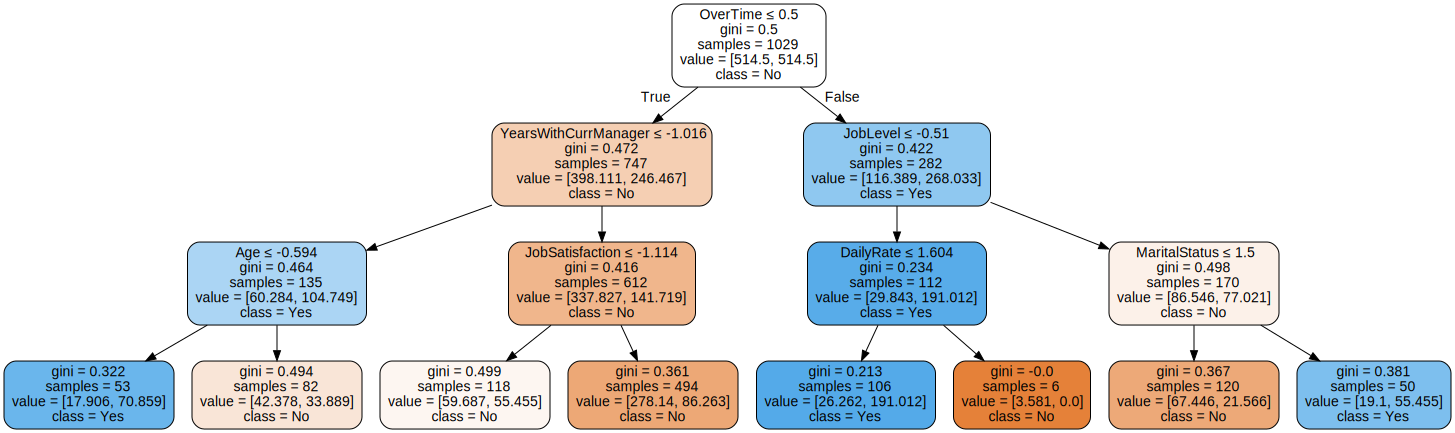

In [60]:
dot_data = tree.export_graphviz(clf_, out_file=None, 
                      feature_names=nombres,  
                      class_names=["No", "Yes"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 